# Supervised learning: classifying weather conditions of Cologne Bonn airport
Shanshan Wang  
shanshan.wang@uni-due.de  
Jan. 7, 2021

## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<ol>
<li> <a href="#introduction">Introduction</a><br>
    1.1 <a href="#objective">Main objective</a><br>
    1.2 <a href="#outlines">Outlines</a><br>
</li>
<li> <a href="#data">Data</a><br>
    2.1 <a href="#description">Data description</a><br>
    2.2 <a href="#clearn">Data cleaning</a><br>
    2.3 <a href="#feature">Feature engineering</a><br>
    2.4 <a href="#datasummary">A summary about data</a>
</li>
<li> <a href="#models">Classifier models</a><br>
    3.1 <a href="#lr">Logistic regression</a><br>
    3.2 <a href="#knn">K nearest neighbors</a><br>
    3.3 <a href="#svm">Support vector machines </a><br>
    3.4 <a href="#dt">Decision trees</a><br>
    3.5 <a href="#rf">Bagging and random forest </a><br>
    3.6 <a href="#bs">Boosting and stacking</a><br>
    3.7 <a href="#comparison">Comparison of models</a>
</li>
<li> <a href="#summary">Summary </a>
</li>
<li> <a href="#suggestion">Suggestions for next steps</a>
</li>
</ol>
    
</div>



## <a name="introduction"></a> 1 Introduction

### <a name="objective"></a> 1.1 Main objective

Flight situations of an airport are more likely affected by weather conditions. Correctly classification and prediction of weather conditions are of importance for traveling by airplane. This study aims to classify weather conditions of Cologne Bonn airport using supervised machine learning algorithms. To this end, eleven models in supervised learning are used for classifications of weather conditions based on the features including air temperature, atmospheric pressure, humidity, wind and so on. The models are named standard logistic regression, L1 regularized logistic regression, L2 regularized logistic regression, K nearest neighbors (KNN), support vector machines (SVM), decision trees, random forest, extra random forest, gradient boosted tree, adaptive boosting (AdaBoost) and voting classifier. They are compared and ranked in terms of precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix for the prediction results. For the case in this study, the random forest model shows the best prediction performance for classifications. 

### <a name="outlines"></a> 1.2 Outlines

The report is organized as follows:
* <a href="#data">Section 2</a> describes the used data set, the procedure of data clearning and the relationships of features by feature engeneering.
* <a href="#models">Section 3</a> briefs eleven classification models, applies them to our data set and implements the comparison of models in terms of prediction performances. 
* <a href="#summary">Section 4</a> concludes the key findings and insights for this study.
* <a href="#suggestion">Section 5</a> gives some suggestions for next steps in analyzing this data set. 

## <a name="data"></a> 2 Data

### <a name="description"></a> 2.1 Data description

The data set used in this study comes from the website https://rp5.ru/Weather_archive_in_Cologne,_Bonn_(airport). The data in the resolution of one hour spans the period from October 1, 2021 to December 31, 2021. Total 28 attributes present in the raw data set. By data clearning, only 8 attributes are available in this study, where 7 attributes are as the features of classifications and 1 attributes is the weather conditions as the target of classifications. Table 1 lists the data type and description of the 8 attributes. The classifications of weather conditions from October to December of 2021 contain clouds, fog, rain and snow. For the sake of prediction, each classification are represent by an integer. The finally used and cleaned data matrix has 2201 rows and 8 columns. 


<table>
    <caption>Table 1: Description of attributes in the used datasets</caption>
    <tr><th>attributes</th><th>data type</th><th> Description</th></tr>
    <tr><tr><td>T </td><td>float64</td><td>Air temperature (degrees Celsius) at 2 metre height above the earth's surface</td></tr>
    <tr><td>Po </td><td>float64</td><td> Atmospheric pressure at weather station level (millimeters of mercury)</td></tr>
    <tr><td>P </td><td>float64</td><td> Atmospheric pressure reduced to mean sea level (millimeters of mercury)</td></tr>
    <tr><td>U </td><td>int64</td><td> Relative humidity (%) at a height of 2 metres above the earth's surface</td></tr>
    <tr><td>DD </td><td>int64</td><td> Mean wind direction (compass points) at a height of 10-12 metres above the earth’s surface over the 10-minute period immediately preceding the observation</td></tr>
    <tr><td>Ff </td><td>int64</td><td> Mean wind speed at a height of 10-12 metres above the earth’s surface over the 10-minute period immediately preceding the observation (meters per second)</td></tr>
    <tr><td>WW </td><td>int64</td><td> Present weather reported from a weather station </td></tr>
    <tr><td>Td </td><td>float64</td><td> Dewpoint temperature at a height of 2 metres above the earth's surface (degrees Celsius)</td></tr>
</table>


In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df=pd.read_csv('10513.01.10.2021.31.12.2021.1.0.0.en.utf8.00000000.csv',\
               sep=';',encoding='utf8',header=6,index_col=False)
df=df.iloc[::-1]
df.set_index('Local time in Cologne / Bonn (airport)',inplace=True)
df.head(3)

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Local time in Cologne / Bonn (airport),,,,,,,,,,,,,,,,,,,,,
01.10.2021 00:00,10.2,758.4,767.5,NaN,77,Wind blowing from the south-east,3,NaN,NaN,"90 or more, but not 100%",...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",60.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN
01.10.2021 01:00,9.5,758.2,767.3,NaN,81,Wind blowing from the south-east,3,NaN,NaN,"90 or more, but not 100%",...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",60.0,6.4,No precipitation,6.0,"Dry (without cracks, no appreciable amount of ...",NaN,NaN,NaN
01.10.2021 02:00,9.8,757.7,766.8,NaN,77,Wind blowing from the south-east,3,NaN,NaN,"90 or more, but not 100%",...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",60.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2201, 28)

### <a name="clean"></a> 2.2 Data cleaning

In [4]:
# drop the columns with any nan values
df.dropna(axis=1,how="any",inplace=True)
# list the cases of present weather conditions
weather_unique=df['WW'].unique().tolist()

In [5]:
for i in range(0,len( weather_unique)):
    if i==0:
        df.replace( weather_unique[i], math.nan, inplace=True) 
    elif weather_unique[i].startswith("Clouds"):
        df.replace( weather_unique[i], 'Clouds', inplace=True) 
    elif weather_unique[i].startswith("Fog") or weather_unique[i].startswith("Mist") or \
    weather_unique[i].startswith("More" ) or weather_unique[i].startswith("Patches" ):
        df.replace(weather_unique[i], 'Fog', inplace=True) 
    elif weather_unique[i].startswith("Snow") or weather_unique[i].startswith("Isolated") or \
    weather_unique[i].startswith( "Intermittent"): 
        df.replace(weather_unique[i], 'Snow', inplace=True) 
    elif weather_unique[i].startswith("State"): 
        df.replace(weather_unique[i], math.nan, inplace=True)
    elif weather_unique[i].startswith("Precipitation") or  weather_unique[i].startswith("Rain" ) or \
    weather_unique[i].startswith("Drizzle") or weather_unique[i].startswith("Shower"): 
        df.replace(weather_unique[i], 'Rain', inplace=True) 

In [6]:
# fill the missing value by the last valid observation
df.fillna(method='ffill',inplace=True)
# fill the missing value at the beginning by the next valid observation
df.fillna(method='bfill',inplace=True)

In [7]:
# list the counts of weather conditions
df['WW'].value_counts()

Rain      1198
Fog        584
Clouds     410
Snow         9
Name: WW, dtype: int64

In [8]:
# list the counts of wind directions
df['DD'].value_counts()

Wind blowing from the east-southeast     368
Wind blowing from the south-east         303
Wind blowing from the south              262
Wind blowing from the west               223
Wind blowing from the south-southeast    190
Wind blowing from the east               178
Wind blowing from the south-southwest    151
Wind blowing from the west-southwest     119
Wind blowing from the south-west         114
Wind blowing from the west-northwest      59
Wind blowing from the east-northeast      59
Wind blowing from the north-west          52
Wind blowing from the north-northwest     40
Wind blowing from the north               36
Wind blowing from the north-east          21
Wind blowing from the north-northeast     16
Calm, no wind                             10
Name: DD, dtype: int64

`LabelEncoder` will be used to fit_transform the "DD" and "WW" column to integers.

In [9]:
from sklearn.preprocessing import LabelEncoder

dff=df.copy()
lw = LabelEncoder()
dff['WW'] = lw.fit_transform(dff['WW'])
lw_name_mapping = dict(zip(lw.classes_, lw.transform(lw.classes_)))
print(lw_name_mapping)

{'Clouds': 0, 'Fog': 1, 'Rain': 2, 'Snow': 3}


In [10]:
ld = LabelEncoder()
dff['DD'] = ld.fit_transform(dff['DD'])
ld_name_mapping = dict(zip(ld.classes_, ld.transform(ld.classes_)))
print(ld_name_mapping)

{'Calm, no wind': 0, 'Wind blowing from the east': 1, 'Wind blowing from the east-northeast': 2, 'Wind blowing from the east-southeast': 3, 'Wind blowing from the north': 4, 'Wind blowing from the north-east': 5, 'Wind blowing from the north-northeast': 6, 'Wind blowing from the north-northwest': 7, 'Wind blowing from the north-west': 8, 'Wind blowing from the south': 9, 'Wind blowing from the south-east': 10, 'Wind blowing from the south-southeast': 11, 'Wind blowing from the south-southwest': 12, 'Wind blowing from the south-west': 13, 'Wind blowing from the west': 14, 'Wind blowing from the west-northwest': 15, 'Wind blowing from the west-southwest': 16}


In [11]:
dff.head()

,T,Po,P,U,DD,Ff,WW,Td
Local time in Cologne / Bonn (airport),,,,,,,,
01.10.2021 00:00,10.2,758.4,767.5,77,10,3,2,6.3
01.10.2021 01:00,9.5,758.2,767.3,81,10,3,2,6.4
01.10.2021 02:00,9.8,757.7,766.8,77,10,3,2,5.9
01.10.2021 03:00,9.6,757.2,766.3,76,3,3,2,5.6
01.10.2021 04:00,8.8,756.9,766.0,81,10,4,2,5.7


In [12]:
dff.dtypes

T     float64
Po    float64
P     float64
U       int64
DD      int64
Ff      int64
WW      int64
Td    float64
dtype: object

In [13]:
# feature variables
df_x=dff[{'T','Po','P','U','DD','Ff','Td'}]
# predicted variable
df_y=dff[{'WW'}]

In [14]:
# data description for features
round(df_x.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
T,2201.0,7.38,4.55,-7.6,4.2,7.4,10.2,21.6
DD,2201.0,8.69,4.65,0.0,3.0,10.0,12.0,16.0
Ff,2201.0,3.15,1.82,0.0,2.0,3.0,4.0,13.0
Po,2201.0,753.50,8.59,730.0,746.5,755.3,760.4,771.2
P,2201.0,762.64,8.69,739.0,755.5,764.4,769.6,780.6
Td,2201.0,5.01,3.94,-9.2,2.3,5.5,7.7,15.7
U,2201.0,85.94,11.02,46.0,79.0,89.0,95.0,100.0


### <a name="feature"></a> 2.3 Feature engineering

In [15]:
#from scipy import stats 
#from scipy.stats import norm, expon, cauchy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')

In [16]:
# transform features by scaling each feature to a range between zero and one.
x_scaled = MinMaxScaler().fit_transform(df_x)
df_x = pd.DataFrame(x_scaled, index=df_x.index, columns=df_x.columns)
df_x.head()

,T,DD,Ff,Po,P,Td,U
Local time in Cologne / Bonn (airport),,,,,,,
01.10.2021 00:00,0.609589,0.6250,0.230769,0.689320,0.685096,0.622490,0.574074
01.10.2021 01:00,0.585616,0.6250,0.230769,0.684466,0.680288,0.626506,0.648148
01.10.2021 02:00,0.595890,0.6250,0.230769,0.672330,0.668269,0.606426,0.574074
01.10.2021 03:00,0.589041,0.1875,0.230769,0.660194,0.656250,0.594378,0.555556
01.10.2021 04:00,0.561644,0.6250,0.307692,0.652913,0.649038,0.598394,0.648148


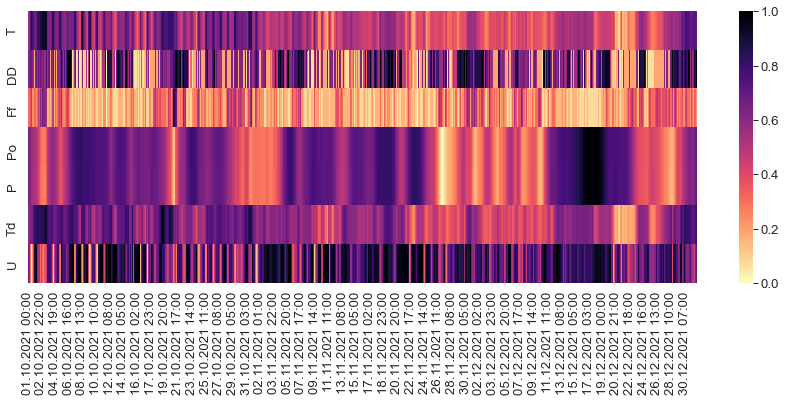

In [17]:
# data matrix of transpose of df3
ax = plt.subplots(figsize=(15, 5))
ax=sns.heatmap(df_x.T,cmap="magma_r").set(ylabel='',xlabel='')

In [18]:
# Calculate the correlations between the feature variables.
corr_values = df_x.corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.head()

,feature1,feature2,correlation,abs_correlation
0,T,DD,0.286436,0.286436
1,T,Ff,0.285307,0.285307
2,T,Po,0.023899,0.023899
3,T,P,0.006035,0.006035
4,T,Td,0.888159,0.888159


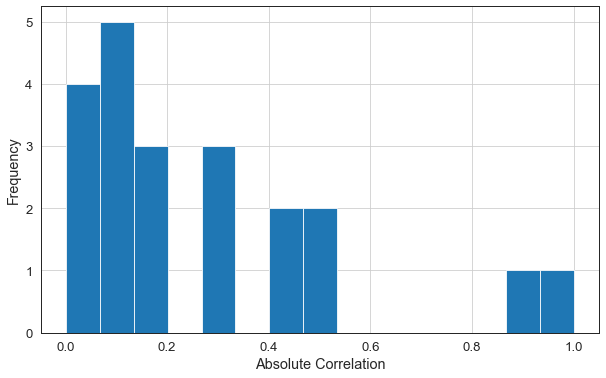

In [19]:
# draw a histogram of the absolute value correlations.
ax = corr_values.abs_correlation.hist(bins=15, figsize=(10, 6))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [20]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
15,Po,P,0.999827,0.999827
4,T,Td,0.888159,0.888159


In [21]:
# Split the data into train and test data sets.
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(df_x, df_y))

# Create the dataframes
X_train = df_x.iloc[train_idx.tolist(),:]
y_train = df_y.iloc[train_idx.tolist(),:]

X_test  = df_x.iloc[test_idx.tolist(),:]
y_test  = df_y.iloc[test_idx.tolist(),:]

In [22]:
y_train.value_counts(normalize=True)

WW
2     0.544156
1     0.265584
0     0.186364
3     0.003896
dtype: float64

In [23]:
y_test.value_counts(normalize=True)

WW
2     0.544629
1     0.264750
0     0.186082
3     0.004539
dtype: float64

### <a name="datasummary"></a> 2.4 A summary about data

The raw data obtained has 2201 rows and 28 columns which includes many missing values. The data clearning removed the missing values and reduced the number of columns of attributes. Hence the availble data has 2201 rows and 8 columns, where 7 columns are as the features for classifying and 1 column as the targets of classifications. We implemented the normalization for the 7 features with regard to different data scales leading to different importances for classifying. The statistics of correlations among 7 features reveals a strong relationship between features P and Po and between features T and Td. We further split the data set into a train and a test data set regarding 30% test data. The classifications for weather conditions contains cloud represented by 0, fog represented by 1, rain represented by 2 and snow represented by 3. Among the four kind of weather conditions, the rain occupies 54.45%, fog 26.47%, cloud 18.60% and snow 0.45%.

## <a name="models"></a> 3 Classifier models

This sections briefs and carries out 11 models in supervised learning for classifications. Each model is first fitted by the training data set. For some models, a grid search is carried out to find the best estimators. Then each fitted model is used for predicting the weather conditions with the test data set. The prediction performance is evaluated by the precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix for the prediction. The 11 classification models and their comparison are organized as follows.  

* <a href="#lr">Section 3.1</a> uses standard logistic regression, L1 regularized logistic regression and L2 regularized logistic regression.
* <a href="#svm">Section 3.2</a> uses K nearest neighbors (KNN).
* <a href="#knn">Section 3.3</a> uses support vector machines (SVM). 
* <a href="#dt">Section 3.4</a> uses decision trees.
* <a href="#rf">Section 3.5</a> uses random forest and extra random forest.
* <a href="#bs">Section 3.6</a> uses gradient boosted tree, adaptive boosting (AdaBoost) and voting classifier.
* <a href="#comparison">Section 3.7</a> compares the performance of the above 11 classification models.

### <a name="lr"></a> 3.1 Logistic regression

Logistic regression models the probabilities for classification problems with a logistic function.

General logistic function in terms of variable $x$
$$P(x)=\frac{1}{1+e^{-(\beta_0+\beta_1 x+\varepsilon)}}\approx\frac{e^{(\beta_0+\beta_1 x)}}{1+e^{(\beta_0+\beta_1 x)}}\ . $$
Odds ratio of the dependent variable $x$
$$\frac{P(x)}{1-P(x)}=e^{(\beta_0+\beta_1 x)}\ , \qquad \log \frac{P(x)}{1-P(x)}=\beta_0+\beta_1 x \ .$$

Confusion matrix is a table that summarize the performance of a classification algorithm, e.g.,

<table>
<tr> <th>               </th> <th> Predicted Positive  </th> <th>  Predicted Negative </th> </tr>                   
<tr> <td> Actual Positive </td><td> True Positive (TP)  </td><td> False Negative (FN) </td> </tr>
<tr> <td> Active Negative </td><td>False Positive (FP) </td><td> True Negative (TN)  </td> </tr>
</table>
 
For predicting correctly, $$\mathsf{Accuracy}=\frac{\mathsf{TP}+\mathsf{TN}}{\mathsf{TP}+\mathsf{TN}+\mathsf{FP}+\mathsf{FN}}$$ 
For identifying all positive instances, $$\mathsf{Recall~or~Sensitivity}=\frac{\mathsf{TP}}{\mathsf{TP}+\mathsf{FN}}$$            
For identifying only positive instances, $$\mathsf{Precision}=\frac{\mathsf{TP}}{\mathsf{TP}+\mathsf{FP}}$$ 
For avoiding false alarms, $$\mathsf{Specificity}=\frac{\mathsf{TN}}{\mathsf{TN}+\mathsf{FP}}$$ 
F1 score captures the trade-off between recall and precision, $$\mathsf{F1}=2\frac{\mathsf{Precision}\times\mathsf{Recall}}{\mathsf{Precision}+\mathsf{Recall}}$$

Multiple class error metrics :
<table>
<tr> <th>               </th> <th> Predicted Class 1  </th><th>  Predicted Class 2 </th><th>  Predicted Class 3 </th></tr>                   
<tr> <td> Actual Class 1 </td><td> TP1  </td><td>  </td><td>   </td></tr>
<tr> <td> Actual Class 2 </td><td>    </td><td> TP2  </td><td>  </td></tr>
<tr> <td> Actual Class 3 </td><td>    </td><td>    </td><td> TP3  </td></tr> 
</table>
 
$$\mathsf{Accuracy}=\frac{\mathsf{TP1}+\mathsf{TP2}+\mathsf{TP3}}{\mathsf{Total}}$$ 
 
Receiver operating characteristic (ROC) curve indicates the sensitivity or the recall and can be used evaluate the classification metrics. The ROC area under the curve, i.e., ROC AUC, gives a measure of how well we are separating the two classes. In the ROC matrix of true positive rate (i.e., sensitivity) versus false positive rate (i.e., 1-specificity), the diagonal of the matrix represents the value obtained by randomly guessing, ROC-AUC=0.5, the lower right triangle of the matrix indicates the value obtained worse than guessing ROC-AUC<0.5, and the top left triangle indicates the value obtained better than guessing, ROC-AUC>0.5. The closer the value to the top left corner, the better the classification model is. ROC curve is generally better for data with balanced classes.

Precision-recall curve measures the trade-off between precision and recall. It is generally better for data with imbalanced classes.




In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [25]:
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
# L1 regularized logistic regression with cross validation of 4 folds
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
# L2 regularized logistic regression with cross validation of 4 folds
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [26]:
# Combine all the coefficients into a dataframe
coefficients = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]
for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3]], 
                                 codes=[[0,0,0,0], [0,1,2,3]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))
coefficients = pd.concat(coefficients, axis=1)
coefficients

lr                                       l1                        \
          0         1         2         3          0          1          2   
0 -0.997741  0.337767  0.205985 -1.716821 -42.645138  66.483707 -34.447509   
1 -0.508546 -1.940007  2.101315 -0.822119  -0.469926  -2.129128   2.228721   
2  0.811549 -1.256073  0.059886 -0.573268   0.174591  -0.423828   0.255464   
3  0.965388  1.449508 -1.987431 -0.604000   2.230013   2.765854  -9.291913   
4  0.980607  1.432702 -1.990057 -0.580130   0.000000   0.366573   5.159344   
5 -1.951430 -0.357339  2.247780 -1.770866  33.970229 -57.882649  33.193651   
6 -3.198248  0.160893  2.261183 -0.867255 -18.681391  23.552731  -9.224993   

               l2                                  
     3          0          1          2         3  
0  0.0 -30.218256  65.515898 -31.563158 -0.034998  
1  0.0  -0.482717  -2.126515   2.227073 -0.036842  
2  0.0   0.356009  -0.427506   0.254186 -0.016516  
3  0.0   1.901672   4.269769 -16.896386 -0.038777  
4  0.0   0.291086  -1.130084  12.742367 -0.038632  
5  0.0  23.079140 -57.068313  30.828894 -0.038936  
6  0.0 -14.204678  23.228033  -8.299328 -0.050509

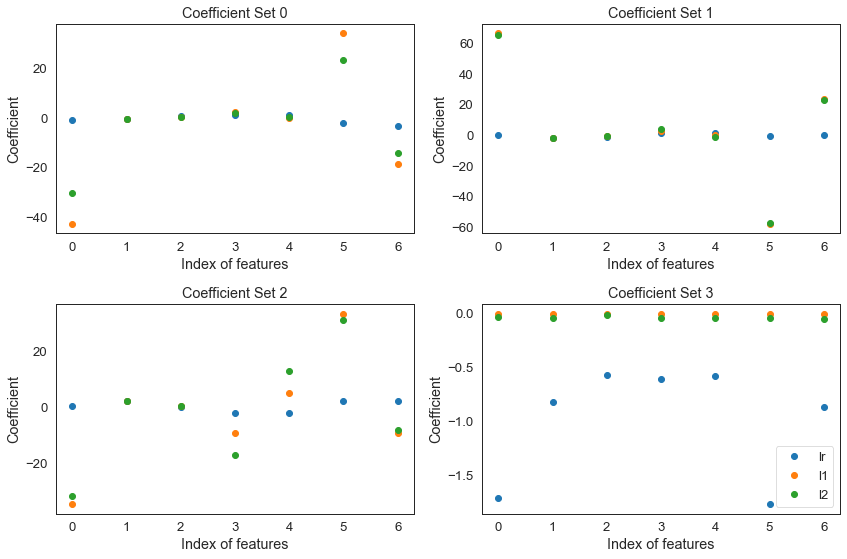

In [27]:
# draw coefficients versus 7 features for each of the multi-class coefficients.
fig,axes=plt.subplots(2,2,figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    data = coefficients.xs(idx, level=1, axis=1) # extract the coefficients for each class at level 1 of columns
    data.plot(marker='o', ls='', ms=6.0, ax=ax, legend=False)
    if idx==3:
        ax.legend(loc=4)
    ax.set(title='Coefficient Set '+str(idx), xlabel="Index of features",  ylabel="Coefficient")
plt.tight_layout()

In [28]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()
for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)
y_pred.head()

,lr,l1,l2
0,1,3,1
1,2,2,2
2,2,2,2
3,2,3,2
4,2,2,2


In [29]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [30]:
# calculate error metrics for each model, i.e., standard logistic regression (lr), 
# L1 regularized logistic regression (l1) and L2 regularized logistic regression (l2)  

metrics_lrs = list() 
cm_lrs = dict()
for lab in coeff_labels:
    # calculate precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])    
    # calculate ROC-AUC scores by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3]),
              label_binarize(y_pred[lab], classes=[0,1,2,3]), 
              average='weighted')    
    # calcualte the confusion matrix
    cm_lrs[lab] = confusion_matrix(y_test, y_pred[lab])
    metrics_lrs.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, name=lab))
metrics_lrs = pd.concat(metrics_lrs, axis=1)

### <a name="knn"></a> 3.2 K nearest neighbors

For an appropriate K Nearest Neighbors (KNN) model, a right value of K and a method for the measurement of the distance between neighbors are required. Elbow method is a common approach to determine the K vlaue. In a curve of the error rate as a function of K, the K is chosen at an Elbow point where the model approaches the minimum error on the hold out set. Beyond the Elbow point, the rate of improvement slows or stops. The widely used methods for [distance measurements](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric) include Euclidean distance
$$d_E=\sqrt{\sum\limits_i (p_i-q_i)^2}$$
and Manhattan distance
$$d_M=\sum\limits_i |p_i-q_i|  \ .$$
Features with large distances have a heavier effect on the outcome in contrast to those with small distances. To aviod this, feature scaling is important to make the distances of features in a similar scale.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

In [32]:
# search for the best K value
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy
for k in range(1, max_k):  
    # estimate KNN model
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    # predict with KNN model
    y_pred = knn.predict(X_test)
    # calculate F1-score and error rates
    f1 = f1_score(y_pred, y_test, average='weighted')
    f1_scores.append((k, round(f1, 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

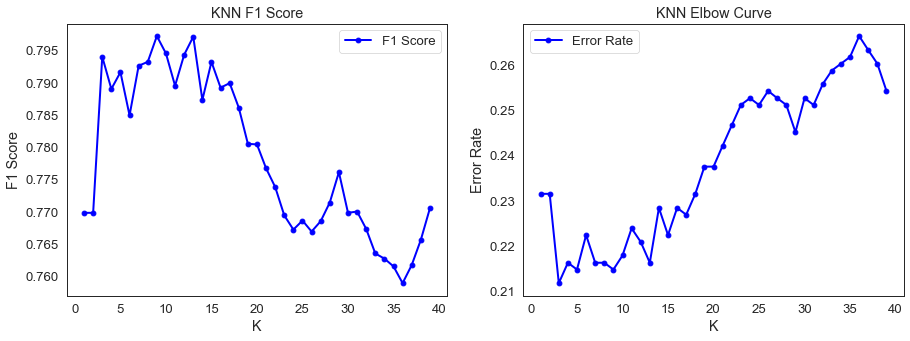

In [33]:
# Plot F1 and error results
fig, axes=plt.subplots(1,2,figsize=(15,5))
axes = axes.flatten()
f1_results.set_index('K').plot(color='blue', marker='o',linewidth=2, ax=axes[0])
axes[0].set(title='KNN F1 Score', xlabel='K', ylabel='F1 Score')
error_results.set_index('K').plot(color='blue', marker='o', linewidth=2, ax=axes[1])
axes[1].set(title='KNN Elbow Curve', xlabel='K', ylabel='Error Rate');

Here we select K=3 where the error rate is the lowest and the F1 Score which captures the trade-off between recall and precision is high.

In [34]:
def measure_error(y_true, y_pred, modelname):
    # calculate precision, recall, f-score, accuracy, ROC-AUC scores 
    precision, recall, fscore, _ = score(y_true, y_pred, average='weighted')     
    accuracy = accuracy_score(y_true, y_pred)    
    auc = roc_auc_score(label_binarize(y_true, classes=[0,1,2,3]),
                        label_binarize(y_pred, classes=[0,1,2,3]), 
                        average='weighted')    
    # calcualte the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metric=pd.Series({'precision':precision, 'recall':recall, 
                                  'fscore':fscore, 'accuracy':accuracy,
                                  'auc':auc}, name=modelname).to_frame()
    return metric,cm

In [35]:
# fit KNN model with K=3 and Minkowski distance
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') 
knn = knn.fit(X_train, y_train)
# predict with KNN model
y_pred = knn.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_knn, cm_knn=measure_error(y_test, y_pred, 'knn')

### <a name="svm"></a> 3.3 Support vector machines

A support-vector machine is a supervised learning model for the classification, regression, or other tasks by constructing a hyperplane or set of hyperplanes in a high- or infinite-dimensional space.

In [36]:
from sklearn.svm import SVC

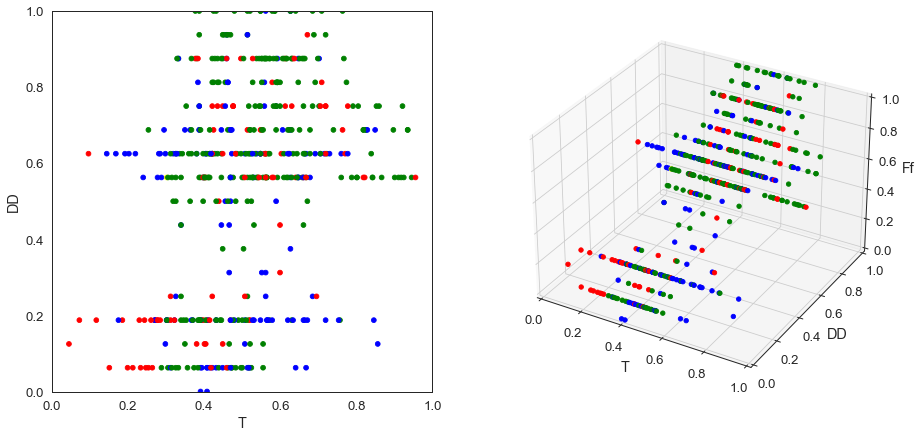

In [37]:
# draw scatter plot of the first two and three features with the points colored according to categories
# map each category to a color 
def colormap(x):
    if x==0:
        return 'red'
    elif x==1:
        return 'blue'
    elif x==2:
        return 'green'
    elif x==3:
        return 'yellow'
X_color = df_x.sample(500, random_state=45)
y_color = df_y.loc[X_color.index]
y_color = y_color.applymap(lambda r: colormap(r) )

fig = plt.figure(figsize=(15,7))
ax0 = fig.add_subplot(1,2,1)
ax0.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color.iloc[:,0].to_list(), alpha=1)
ax0.set(xlabel=df_x.columns[0], ylabel=df_x.columns[1], xlim=[0, 1], ylim=[0, 1]);
ax1 = fig.add_subplot(1,2,2, projection='3d')
ax1.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], X_color.iloc[:, 1], marker='o', 
            alpha=1,edgecolor=y_color.iloc[:,0].to_list(),color=y_color.iloc[:,0].to_list())
ax1.set(xlabel=df_x.columns[0], ylabel=df_x.columns[1], zlabel=df_x.columns[2], 
        xlim=[0, 1], ylim=[0, 1], zlim=[0, 1]);


There is no clear linear decision boundaries between four categories in a 2-dimensional space, but may exit decision boundaries of hypeplane in a 3-dimensional space

In [38]:
# fit SVC model
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_svc, cm_svc=measure_error(y_test, y_pred, 'svc')

### <a name="dt"></a> 3.4 Decision trees

Algorithm:
* Select a feature and split data in a binary tree.
* Continue splitting with available features until 
  * leaf nodes are pure, i.e., only one class remains, or 
  * a maximum depth is reached, or
  * a performance metric is achieved, e.g., a certain accuracy 
  
The best splitting can be defined as the one that maximizes information gained from the splitting. The [information gain](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees) of the entropy-based splitting from node $i$ at step $t$ to nodes $j$ at step $t+1$ is defined by
$$IG(i,t+1)=H(i,t)-\sum\limits_j p(j,t+1)*H(j,t) \ ,$$
where the entropy for node $i$ at step $t$ is written by
$$H(i,t)=-\sum\limits_{i=1}^{n}p(i,t)\log_2\big(p(i,t)\big)$$
and the $p(i,t)$ is the probability for the positive case. In contrast to the splitting based on the classification error 
$$E(i,t)=1-\mathrm{max}_i\big(p(i,t)\big)$$
which leads the end nodes not homogeneous, the splitting based on entropy can reach the goal of the homogeneous nodes in the end. The often used splitting is based on Gini Index, defined by
$$G(i,t)=1-\sum\limits_{i=1}^{n}p^2(i,t) \ . $$

To find the best splitting at each step, Greedy search can be used.

Decision tree tends to overfit and high-variance. One solution to reduce the variance is pruning trees based on a classification error threshold. Another solution is combining predictions from many different trees. 
 

In [39]:
#!pip install pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [40]:
# fit the dicision tree model
dt = DecisionTreeClassifier(random_state=37)
dt = dt.fit(X_train, y_train)
# The number of nodes and the maximum actual depth.
dt.tree_.node_count, dt.tree_.max_depth

(657, 17)

In [41]:
# use grid search with cross validation to find a decision tree that performs well on the train data set
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}
GR = GridSearchCV(DecisionTreeClassifier(random_state=37),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)
GR = GR.fit(X_train, y_train)

# the number of nodes and the depth of the tree with the best estimator.
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(661, 15)

In [42]:
dt=GR.best_estimator_
dt.tree_.node_count, dt.tree_.max_depth

(661, 15)

In [43]:
# predict using the dicision tree model with the best estimator
y_pred = dt.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_dt, cm_dt=measure_error(y_test, y_pred, 'dt')

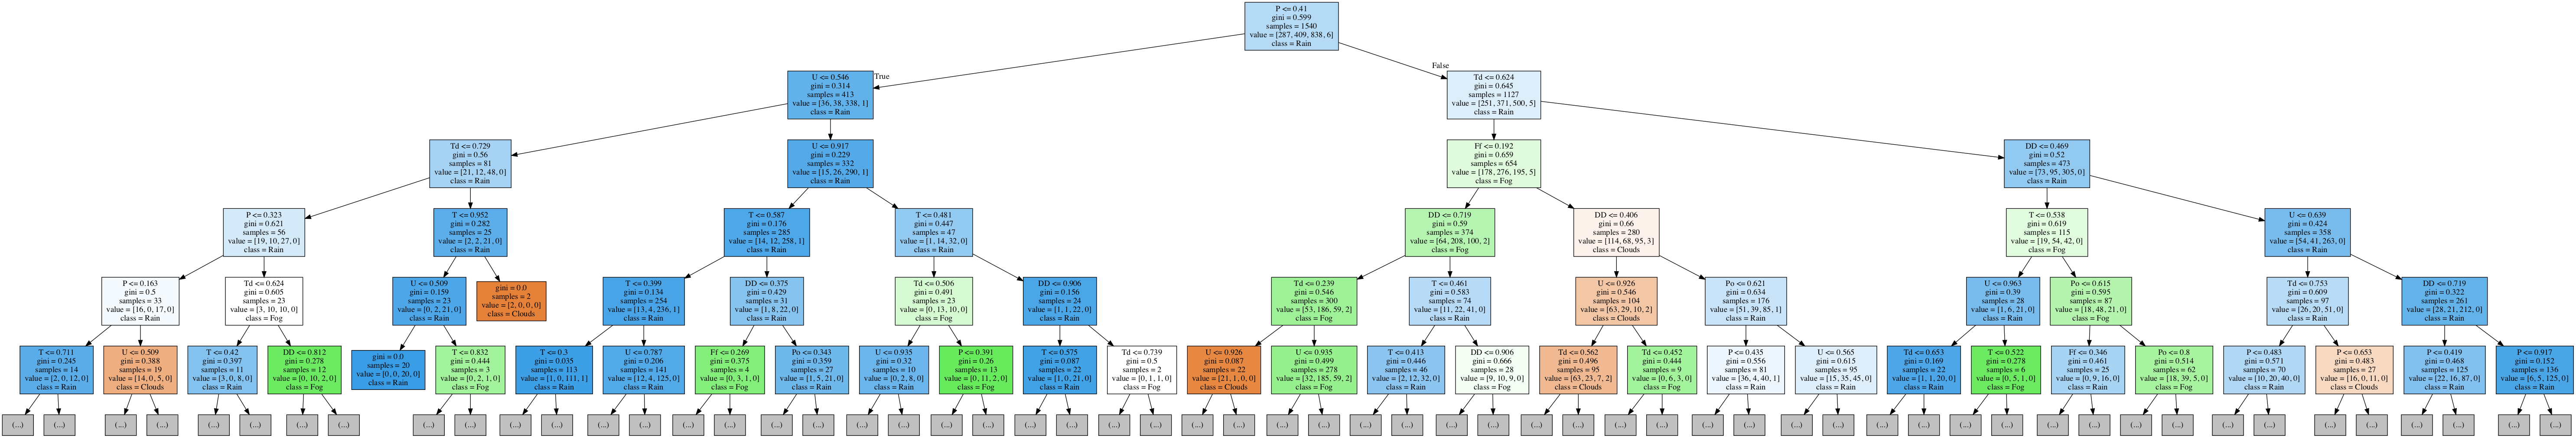

In [44]:
# create an output destination for the file
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, max_depth=5, 
                class_names=['Clouds', 'Fog', 'Rain', 'Snow'],feature_names=df_x.columns.tolist())
# GraphViz need to be installed with a package manager on Linux and Mac
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# view the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

### <a name="rf"></a> 3.5 Bagging and random forest

Bagging, short for bootstrap aggregating, is an ensamble-based method that helps to reduce variance and avoid overfitting. It is usually applied to decision tree methods. For $n$ independent trees, each with variance $\sigma^2$, the bagging variance is $\sigma^2/n$. However, the bootstrap samples may be correlated. If the correlation coefficient is $\rho$, the bagging variance equals to $\rho\sigma^2 +(1-\rho)\sigma^2/n$. With the increase of $n$, the variance tends to $\rho\sigma^2$. To avoid this, more randomness can be introduced by further de-correlating tree or using random setset of features for each tree, e.g. the random subset with $\sqrt{m}$ features for classifications and $m/3$ features for regressions, where $m$ is the total number of features. This method is called random forest. Relative to bagging, variance is further reduced for random forest. By selecting features randomly and creating splitting randomly, more randomness is introduced to random forest. This method is called extra random trees. 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
# fit random forest models with a range of tree numbers 
# and evaluate the out-of-bag error for each of these models.

# initialize the random forest estimator
RF = RandomForestClassifier(oob_score=True, random_state=37, warm_start=True,n_jobs=-1)
oob_list = list()
# search the best number of trees
for n_trees in range(20,500,10):    
    # set the number of trees
    RF.set_params(n_estimators=n_trees)
    # fit the model
    RF.fit(X_train, y_train)
    # evaluate the out-of-bag error
    oob_error = 1 - RF.oob_score_    
    # store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

In [47]:
# number of trees with the minimal out-of-bag error
n_tree=int(rf_oob_df.idxmin().values[0])
n_tree

230

In [48]:
rf = RandomForestClassifier(oob_score=True, n_estimators=n_tree, random_state=37, warm_start=True, n_jobs=-1)
# fit the model
rf.fit(X_train, y_train)
# predict using the dicision tree model with the best estimator
y_pred = rf.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_rf, cm_rf=measure_error(y_test, y_pred, 'rf')

In [49]:
# fit extra random forest models with a range of tree numbers 
# and evaluate the out-of-bag error for each of these models.

# initialize the extra random forest estimator
EF = ExtraTreesClassifier(oob_score=True, random_state=37, warm_start=True, bootstrap=True, n_jobs=-1)
oob_list = list()
# search the best number of trees
for n_trees in range(20,500,10):    
    # set the number of trees
    EF.set_params(n_estimators=n_trees)
    # fit the model
    EF.fit(X_train, y_train)
    # evaluate the out-of-bag error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
ef_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

In [50]:
# number of trees with the minimal out-of-bag error
n_tree=int(ef_oob_df.idxmin().values[0]) 
n_tree

250

In [51]:
ef = ExtraTreesClassifier(oob_score=True, random_state=37, n_estimators=n_tree, warm_start=True,
                          bootstrap=True, n_jobs=-1)
# fit the model
ef.fit(X_train, y_train)
# predict using the dicision tree model with the best estimator
y_pred = ef.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_ef, cm_ef=measure_error(y_test, y_pred, 'ef')

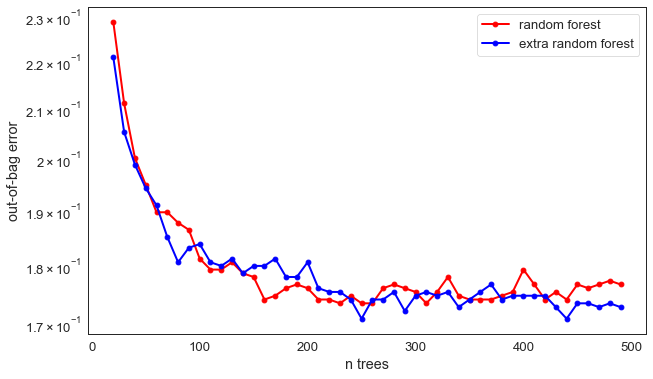

In [52]:
# draw out-of-bag error versus the number of trees
fig,ax=plt.subplots(figsize=(10,6))
rf_oob_df.plot(marker='o', color='red', linewidth=2, legend=True, logy=True,ax=ax)\
.set(ylabel='out-of-bag error', xlabel='n trees')
ef_oob_df.plot(marker='o', color='blue', linewidth=2, legend=True, logy=True,ax=ax)\
.set(ylabel='out-of-bag error', xlabel='n trees')
ax.legend(['random forest', 'extra random forest']);

### <a name="bs"></a> 3.6 Boosting and stacking

Boosting Algorithm:

* Create initial decision stump for the first weak classifier, e.g., split all points into two.
* Fit to the model by data and calculate residuals.
* Perform the next weak classifier by adjust weight of points, i.e., weighing falsely classified points more heavily.
* Fit to the model by data and calculate residuals.
* Continue the weak classifiers as above. 
* Combine all considered weak classifiers to a single classifer.
* Output the final decision by combining the decisions (weighted by learning rates) from above weak classifiers.

Learning rate<1 for regularization means less overfitting. It shrinks the impact of each successive learner to a value less than one. 

Booting uses different loss function. AdaBoot (adaptive booting) loss function is exponential, $e^{(-\mathrm{margin})}$ and more sensitive to outliers than other type of boosting. Gradient boosting loss function is more robust than AdaBoot loss function. A common implementation of gradient boosting loss function uses a log likelihood loss function $\log(1+e^{(-\mathrm{margin})})$.

A staked model combines models of any kind. The output of a staked model combines the outputs of base models via weighting or majority votes. 


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [54]:
# fit gradient boosted tree models
# parameters to be fit
param_grid = {'n_estimators': range(50,500,50),
              'learning_rate': [0.01, 0.001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3]}
# grid search object 
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=37), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# the grid search with default 5-fold cross validation
GV_GBC = GV_GBC.fit(X_train, y_train)

In [55]:
# The best model
gbc=GV_GBC.best_estimator_
gbc

GradientBoostingClassifier(learning_rate=0.01, max_features=3, n_estimators=450,
                           random_state=37, subsample=0.5)

In [56]:
# predict using the gradient boosted tree models with the best estimator
y_pred = gbc.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_gbc, cm_gbc=measure_error(y_test, y_pred, 'gbc')

In [57]:
# fit AdaBoost model  
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=dt.tree_.max_depth))
param_grid = {'n_estimators': range(50,500,50),
              'learning_rate': [0.01, 0.001]}
GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# the grid search with default 5-fold cross validation
GV_ABC = GV_ABC.fit(X_train, y_train)

In [58]:
# The best model
abc=GV_ABC.best_estimator_
abc

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                   learning_rate=0.01, n_estimators=150)

In [59]:
# predict using the AdaBoost model with the best estimator
y_pred = abc.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_abc, cm_abc=measure_error(y_test, y_pred, 'abc')

In [60]:
# fit the combined model with voting classification
estimators = [('lr',lr),('l1',lr_l1),('l2', lr_l2),('knn',knn),('dt',dt),
              ('rf',rf),('ef',ef),('gbc', gbc),('abc',abc)]
# the model using an additional hold-out data set and/or with cross validation
vc = VotingClassifier(estimators, voting='soft')
vc = vc.fit(X_train, y_train)
# predict using the dicision tree model with the best estimator
y_pred = vc.predict(X_test)
# calculate precision, recall, f-score, accuracy, ROC-AUC scores, and confusion matrix 
metric_vc, cm_vc=measure_error(y_test, y_pred, 'vc')

### <a name="comparison"></a> 3.7 Comparison of models

The performance of the above classification models are compared in this section. The confusion matrix for the prediction results is visualized for each model. The diagonal elements in each matrix reveal the true positive values for classifications. The larger value of a diagonal element, the more cases are classified correctly in the corresponding classification. Due to the higher propotion of rain, we can find the high value for the third diagonal element in each confusion matrix. The models are also compared in terms of the precision, recall, F-score, accuracy, ROC-AUC scores for the prediction results. Among all models, K nearest neighbors, random forest, extra random forest and voting classifier perform better. Based on the value averaged over the precision, recall, F-score, accuracy and ROC-AUC scores, we further rank all models. As a result, the random forest performs best and L1 regularized logistic regression performs worest in this study. 

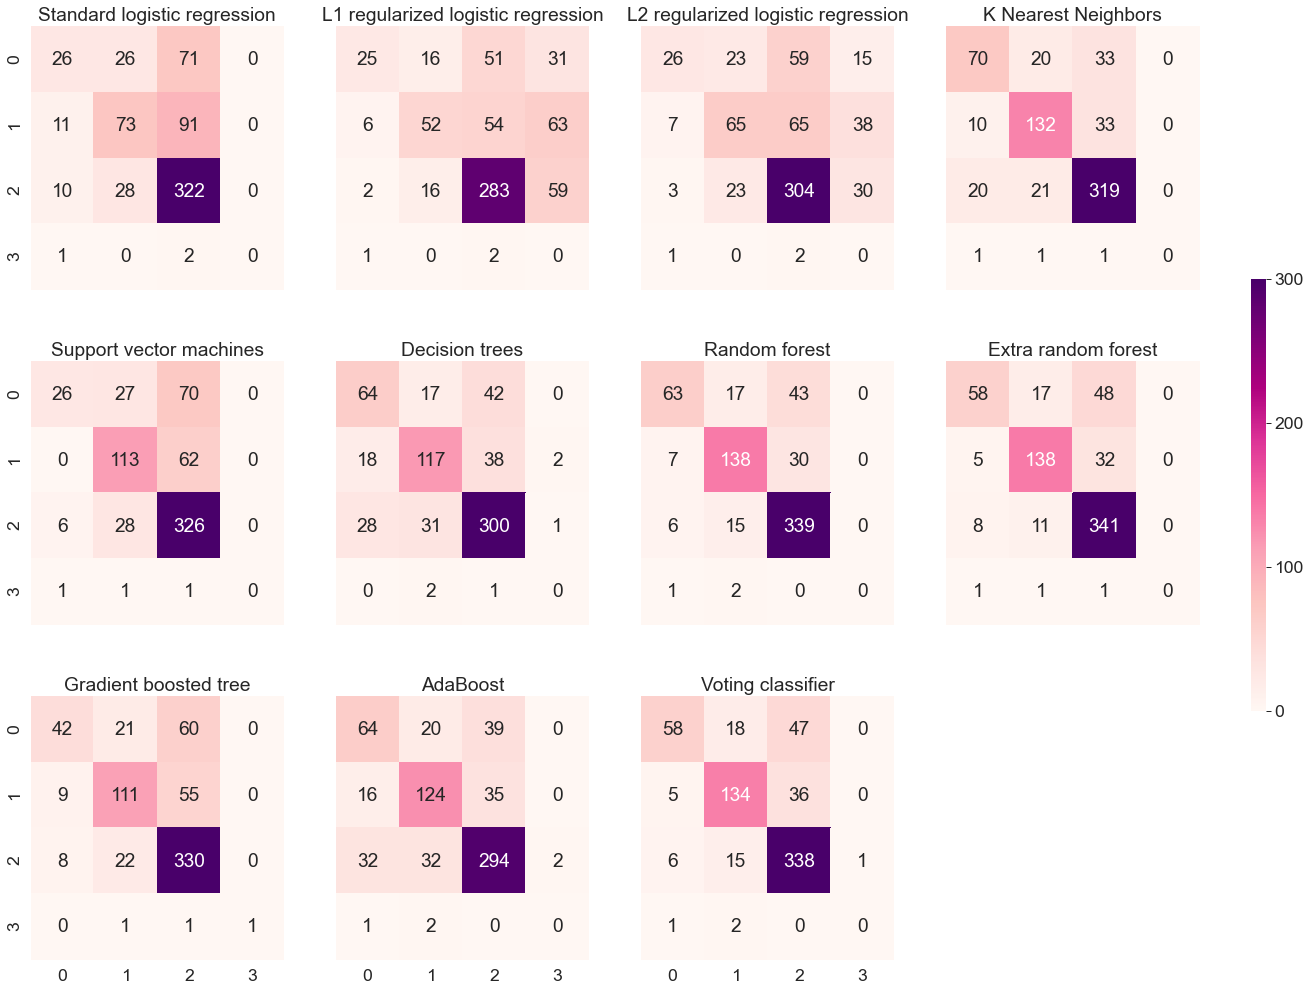

In [61]:
# draw the confusion matrix for each model.
methodnames=['lr','l1','l2','knn','svc','dt','rf','ef','gbc','abc','vc']
titles=['Standard logistic regression','L1 regularized logistic regression','L2 regularized logistic regression',
       'K Nearest Neighbors','Support vector machines','Decision trees','Random forest','Extra random forest',
       'Gradient boosted tree','AdaBoost','Voting classifier']
cm_all=[cm_lrs['lr'],cm_lrs['l1'],cm_lrs['l2'],cm_knn,cm_svc,cm_dt,cm_rf,cm_ef,cm_gbc,cm_abc,cm_vc]

sns.set_context("paper", font_scale=2)
sns.set_style('white')
fig,axes=plt.subplots(3,4,sharex=True, sharey=True, figsize=(20, 15))
axes = axes.flatten()
cbar_ax = fig.add_axes([.90,.3,.01,.4])
# draw the confusion matrix for models.
for idx,name in enumerate(methodnames):  
    sns.heatmap(cm_all[idx], annot=True, fmt='d', vmin=0, vmax=300, cmap="RdPu", cbar_ax = cbar_ax, ax=axes[idx])\
    .set(title=titles[idx]);  
axes[11].set_axis_off()
sns.set(font_scale=4)
fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()

In [62]:
metrics_all=pd.DataFrame()
metrics_all=pd.concat([metrics_lrs, metric_knn,metric_svc,metric_dt, metric_rf,metric_ef,
                       metric_gbc,metric_abc,metric_vc],axis=1)
metrics_all

,lr,l1,l2,knn,svc,dt,rf,ef,gbc,abc,vc
precision,0.613819,0.695923,0.670834,0.779908,0.710450,0.722592,0.812794,0.808766,0.729576,0.724936,0.801358
recall,0.636914,0.544629,0.597579,0.788200,0.703480,0.727685,0.816944,0.812405,0.732224,0.729198,0.801815
fscore,0.599166,0.576584,0.599975,0.782353,0.669538,0.724366,0.806125,0.799337,0.712232,0.726819,0.789509
accuracy,0.636914,0.544629,0.597579,0.788200,0.703480,0.727685,0.816944,0.812405,0.732224,0.729198,0.801815
auc,0.651573,0.664712,0.670080,0.816684,0.714951,0.768978,0.830747,0.822602,0.746242,0.774462,0.814206


[Text(0, 0.5, 'values')]

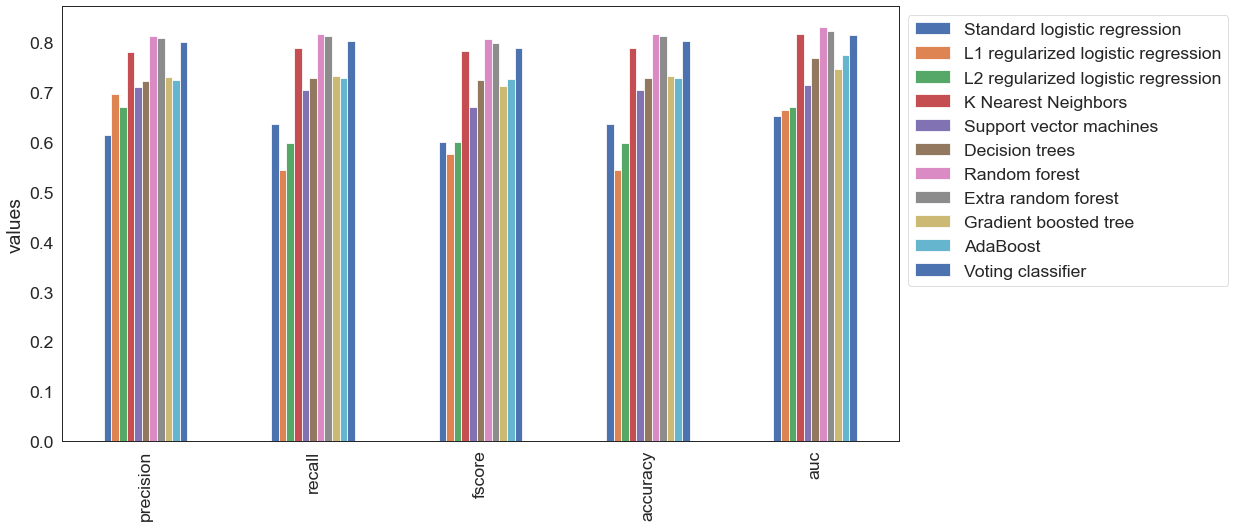

In [63]:
sns.set_context("paper", font_scale=2)
sns.set_style('white')
fig,ax=plt.subplots(figsize=(15,8))
metrics_all.plot.bar(ax=ax)
ax.legend(bbox_to_anchor=(1.0, 1.0),labels=titles)
ax.set(ylabel='values')

Text(0.5, 0, 'mean value')

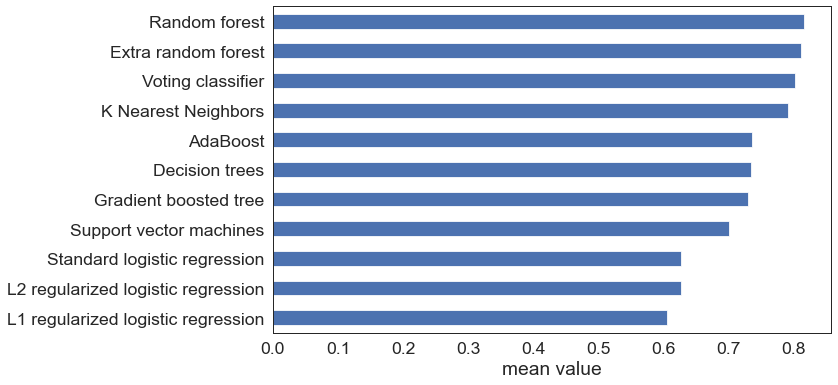

In [64]:
metrics_mean=pd.DataFrame(metrics_all.mean(axis=0),columns={'values'})
metrics_mean.reset_index(inplace=True)
sortidx=metrics_mean.sort_values(by=['values']).index.tolist()
metric_rank=metrics_mean.sort_values(by=['values'])
fig,ax=plt.subplots(figsize=(10,6))
metric_rank.plot.barh(ax=ax,legend=False)
ax.set_yticklabels([titles[i] for i in sortidx]);
ax.set_xlabel('mean value')

## <a name="summary"></a> 4 Summary

This study used 11 models in supervised learning to classify weather conditions of Cologne Bonn airport based on 7 features of classifications including air temperature, atmospheric pressure, humidity, wind and so on. The 11 models are standard logistic regression, L1 regularized logistic regression, L2 regularized logistic regression, K nearest neighbors (KNN), support vector machines (SVM), decision trees, random forest, extra random forest, gradient boosted tree, adaptive boosting (AdaBoost) and voting classifier. We used each model with the best estimator fitted by the training data set to predict the weather conditions with the test data set. We further evaluated the performance of models by several indices, including the precision, recall, f-score, accuracy, ROC-AUC scores, and the confusion matrix. Among all models, K nearest neighbors, random forest, extra random forest and voting classifier perform better. Based on the performance of models estimated by averaging over the precision, recall, f-score, accuracy and ROC-AUC scores, we ranked the models and found that the random forest performs best and L1 regularized logistic regression performs worest in this study.

## <a name="suggestion"></a> 5 Suggestions for next steps

The number of `random_state` has more or less effects on initializing each model function. In particular, the effect is obvious on the number of trees in the decision tree method. This problems should be noticed and fixed for next steps. 

In the current study, the classification was carried out based on the features observed at the same time for the target, i.e., the weather condition. A further step can be done by using the classification models to predict the weathe conditions based on the features at a time preceeding to the time for the corresponding target. The performance of models can be evaluated and comparied.